# Capstone Regression Project

## Business Understanding

I have prepared this document to present to individuals working in real estate companies (or simply looking to sell) in King County, Washington area (or similar markets) a rough idea of what they can expect the sale price of a home to be when dealing with an average average home buyer, their bread and butter.

I define an average home and average home buyer as follows:
* Average home: 
    * The home can not be waterfront or the greenbelt facing property
    * The home must be ready to live in upon purchase; it must meet code and not require substantial repairs or reconstruction
* Average home buyer:
    * Someone looking to purchase a property and move in to said property; therefore, they aren't initially looking for an investment asset
    * They won't have an above average income capable of purchasing luxury, vacation, or custom built homes (i.e. mansions, cabins, etc)

With the statsitical model I develop here you can take in a number of criteria an average home buyer could present, and based on that criteria you can get a rough idea of what the final sale price would be based on properties sold between June 2021 and June 2022.

After getting these baseline criteria you can then consider the following:
- The type of properties you should make attempt to target and get listed under your services (since, again, these will be your business' bread and butter)
- How best to price a property
- When would be the best time to market your services or properties currently under your listings
- Or give you an idea of where you can upsell on smaller details in relationship to a property.

## Data Understanding

The data I'll be working on today comes from https://info.kingcounty.gov/ and it lists housing data of properties sold between June 2021 and June 2022 in King Country, Washington USA. The oldest property in the dataset was constructed in 1900, while the newest was built in 2022. 

I will be using the original 'price' (the dollar value that the house was sold at) column as my regression target. With it, I plan to determine which features are statistically significant in explaining what the final sale price will be for an average home to an average home buyer looking to live in the property they are purchasing.

## Data Preparation

The columns with missing records I see initillay are on the following:
* heat_source
* sewer_system

However, seeing how the these missing records are fewer than 50 from a dataset including over 30k I feel comfortable **removing these records**.

There also appears to be an unusual record under 'sqft_living' that indicates that there is a home with 3 square feet of living space. I am comfortable with **removing this record** as it appears to be a typo or a very unusual outlier. It also won't significantly affect the rest of the dataset.

I have identified a number of non-numeric and categorical data under a number of columns. From these columns I have determined that I will use the following in my statistical model:
* date
* condition
* grade
* heat_source

The following columns will be converted into categorical variables to determine if a property does, or doesn't have a garage.
* sqft_basement
* sqft_garage

### Loading the Data

In [1]:
# Import necessary libarr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
import seaborn as sns

# Just get rid of the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data

df = pd.read_csv('data/kc_house_data.csv')

### Data Exploration

The dataset inlcuding **home sales in King County, Washington from 2021-2022** originally includes 25 columns and a total of 30,155 records.

The 'sqft_living ' does not include the basement.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


#### Value Counts for descriptive and categorical data
Here I am simply checking what values each of the non-numerical and categorical columns have to offer. It also informs me of any values I should consider removing from my dataset.

##### Condition
The 'condition' or as the source of this dataset indicates in their **Residential Glossary of Terms** (check this link for more information https://info.kingcounty.gov/assessor/esales/Glossary.aspx) refers to the 'building condition' is 'relative to the age and grade' of the property. Any record indicating a grade below 'Average' would require significant investment to repairs or reconstruction of the property. With this in mind, I will be removing any records that list a property sold with a 'Fair' or 'Poor' rating. It also helps to know that there were less than 300 properties that fall under this category providing the confidence to classify these home sales as non-average. I would consider any home buyer purchasing homes like this to consider these properties more of an investment asset.

##### Heat Source
This record indicates the method that the homeowner purchasing the home would initially have available for heating their property. Although there is no property that is solely powered by solar I believe that it would be interesting to know whether a home buyer would consider a 'Solar Equipped' property to be more valuable.

There is no mention of what encompasses a home under the 'Other' category. Since there is only 20 records that fall under this descriptor I'm comfortable with removing these records when I get to cleaning the dataset.

##### Floors
This column is pretty self explanatory. This column indicates how many floors a home has.

However, the source of the data doesn't give any additional insight behind the specific meaning for a property with, let's say, 1.5 floors. However, using the information referenced in here (https://rct12.msbexpress.net/RCT45Help/1/Content/story_height.htm) we can determine that, for example:
* a home with 1.5 floors refers to a property with **'two levels of living area characterized by a steep roof slope and dormers (which project from the roof and have windows on their fronts). Because of the roof design, the area of the second floor is usually 40% to 70% of the ground floor area'**.

The same logic would be applied to a property with 2.5 floors, in that it refers to a property with **three levels** of living area but with a **third floor that'll roughly have 40% - %70 the area of the ground floor area**.

##### Waterfront and Greenbelt Facing Homes
The reason why I'm checking waterfront or greenbelt facing properties is to ensure that that the dataset I plan on working with after cleaning it will reflect a real average home sold in King County.

I'm comfortable deciding to remove the records for the 519 waterfront and 773 greenbelt facing properties since they do not reflect an average home sold in this dataset.

##### Grade
Although the source of the data would provide more detail, roughly speaking this column refers to the 'build grade' of a property. Any record indicating a grade between:
* 1-4 uses inferior building materials and/or will not meet code.
* 5-6 uses low cost building materials and will relatively reflect a property of lower value.
* 7 uses average building materials 
* 8-10 uses above average building materials
* 11-14 refers to a property that was constructed with custom work, higher grade building materials, and represents residencies like mansions and other luxury type properties.

With this in mind I have determined that my model will only used properties that fall under the build grade of 5-10 since these will represent the bulk, or average, property sold to a home buyer looking to live in said home. It will also most likely remove any home buyers with above average incomes.

In [6]:
print("Condition")
print(df['condition'].value_counts())
print()
print("Heat Source")
print(df['heat_source'].value_counts())
print()
print("Floors")
print(df['floors'].value_counts())
print()
print("Waterfront?")
print(df['waterfront'].value_counts())
print()
print("Greenbelt?")
print(df['greenbelt'].value_counts())
print()
print("Grade")
print(df['grade'].value_counts())

Condition
Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64

Heat Source
Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

Floors
1.0    13962
2.0    12265
1.5     2439
3.0     1222
2.5      222
4.0       30
3.5       15
Name: floors, dtype: int64

Waterfront?
NO     29636
YES      519
Name: waterfront, dtype: int64

Greenbelt?
NO     29382
YES      773
Name: greenbelt, dtype: int64

Grade
7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64


### Data Cleaning

From my examination of the dataset I have concluded that I will be using, and in some cases renaming, the following columns to design a statistical model.
* date -> which will be replaced by month_sold, year_sold
* price -> sale_price
* condition -> build_cond
* heat_source
* sqft_living
* sqft_lot
* floors -> num_of_floors
* waterfront -> Remove after filtering waterfront properties
* greenbelt -> Remove after filtering greenbelt facing properties
* grade -> build_grade
* sqft_basement -> (Replace with) has_basement
* sqft_garage -> (Replace with) has_garage
* yr_built

#### Changes to the dataset
I will perform the following changes to the existing dataset:

**Records I'll remove**
* The following two points refer to a single record each, and since I believe they won't significantly affect the dataset I feel removing them is the best choice:
    * I will remove an unusual record under sqft_living that indicates a home with 3 square feet of living space inside the property.
    * I will remove a single missing record under heat_source.
* I will remove the records that indicate a home that's on the waterfront or facing the greenbelt then remove the columns.

**Records I'll convert into categorical variables**
* * I will rename the 'floors' column to 'num_floors' and convert it to a categorical variables and dropping the column indicating a single story home so that it'll represent my baseline for my statistical model. The remaining columns will be:
    * num_floor_1.5
    * num_floor_2.0
    * num_floor_2.5
    * num_floor_3.0
    * num_floor_3.5
    * num_floor_4.0
* I will convert both columns 'sqft_basement' and 'sqft_garage' to values indicating whether a property does or doesn't have a basement or garage. After removing the previous columns, I will convert the new columns to categorical variables leaving and dropping the column indicating a home that doesn't have either a basement or a garage so that it'll represent my baseline for my statistical model. The remaining columns will be:
    * has_basement_Yes
    * has_garage_Yes
* I will remove records under the 'building_cond' column that indicate a home that is under 'Poor' and 'Fair' conditions. Then I will preprocess the remaining records so that they may represent categorical and numerical data for the model. Then I'll drop the 'build_cond_Average' column to consider that the baseline for the model I would create.
    * Since this would indicate include less than 300 records of the original 30K+ I have decided that this does not constitute an avereage home sold in King County.
    * On a less analytical point of view. Not many new or existing home buyers would be looking to immediately move into a home that needs significant repairs.
* I will rename all records under 'heat_source' that include 'Solar' to 'Solar_Equipped' and drop the records indicating a home with a heat source of 'Other'. Then I will preprocess the remaining records so that they may represent categorical and numerical data for the model. Then I'll drop the 'build_cond_Gas' column to consider that the baseline for the model I would create since it appears that gas is the most common type of heat source in the dataset.
    * The reason why I combined the variables for 'Gas/Solar', 'Electricity/Solar', 'Oil/Solar' to 'Solar_Equipped' is because I wanted to see if the simple addition of solar power would affect the sale price of a home significantly.
* I will first drop all records that indicate a build_grade not between '5 Fair' and '10 Very Good'. I will then rename all records under 'build_grade' to remove the number next to them. Finally, I'll preprocess the remaining records so that they may represent categorical and numerical data for the model. Then I'll drop the 'build_grade_Fair' column to consider that the baseline for the model I would create.
    * The reason why I'm dropping the records outside of a 'build_grade' outside of the range of '5 Fair' and '10 Very Good' is because: 
        * The homes below these ratings do not meet code and could not exactly be lived in upon purchasing.
        * The homes above these ratings are often custom desinged/built, mansions, or luxury properties that I believe would not meet the criteria for the targeted home buyer for whom I'm modeling the data for.
* Transform the data under 'yr_built' to start at 0 by substracting 1900 from the values there so that the data can be esier to read in the model.

**Reformat and Reproduce New Columns**
* I will convert the date into three different columns ('month_sold', 'day', 'yr_sold') and only keep the 'month_sold' and 'yr_sold' columns.
    * I will then transform the 'yr_sold' colum by substracting 2021 from the values so that the model is easier to read.
    * I will then create a new column called 'season' that will consider the 'Winter', 'Spring', 'Summer', 'Fall'. Then I'll preprocess the 'season' column as a categorical variable and set 'Winter' as my reference variable. 

Upon completing the cleaning of the dataset I now have about roughly **21.1K records** to model the sale price of a property in King County Washington based on sale data of home between June 2021 to June 2022.

#### What I'm Left With
In the end, my remaining dataset will include **21124 records** and **26 columns**.

In [7]:
# Temporary dataframe for cleaning
df_clean = df[['date', 
               'price', 
               'condition', 
               'heat_source', 
               'sqft_living', 
               'sqft_lot', 
               'floors', 
               'waterfront', 
               'greenbelt', 
               'grade', 
               'sqft_basement', 
               'sqft_garage', 
               'yr_built']]


# Rename columns
df_clean = df_clean.rename(columns={"price": "sale_price", 
                                    "condition": "build_cond", 
                                    "floors": "num_floors", 
                                    "grade": 
                                    "build_grade"})
df_clean.head()

,date,sale_price,build_cond,heat_source,sqft_living,sqft_lot,num_floors,waterfront,greenbelt,build_grade,sqft_basement,sqft_garage,yr_built
0,5/24/2022,675000.0,Good,Gas,1180,7140,1.0,NO,NO,7 Average,0,0,1969
1,12/13/2021,920000.0,Average,Oil,2770,6703,1.0,NO,NO,7 Average,1570,0,1950
2,9/29/2021,311000.0,Average,Gas,2880,6156,1.0,NO,NO,7 Average,1580,0,1956
3,12/14/2021,775000.0,Average,Gas,2160,1400,2.0,NO,NO,9 Better,1070,200,2010
4,8/24/2021,592500.0,Average,Electricity,1120,758,2.0,NO,NO,7 Average,550,550,2012


In [8]:
# Remove single record outlier data

# Remove NaN records from heat_source
df_clean = df_clean.dropna()

# Remove outlier record under sqft_living
df_clean = df_clean[df_clean['sqft_living'] > 3]

In [9]:
# Preprocess categorical data for 'num_floors' 'num_floors_1.0' as the baseline

# Preprocess categorical variables for 'num_floors'
df_clean = pd.get_dummies(df_clean, columns=['num_floors'])

# Set 'num_floors_1.0' as a baseline for the model by dropping the column
df_clean = df_clean.drop(['num_floors_1.0'], axis=1)

In [10]:
# Clean data and replace columns for 'sqft_basement' and 'sqft_garage'

# Create a column that shows whether the property does or doesn't have either a basement or a garage
df_clean['has_basement'] = np.where(df_clean['sqft_basement'] != 0, 'Yes', 'No')
df_clean['has_garage'] = np.where(df_clean['sqft_garage'] != 0, 'Yes', 'No')

# Drop 'sqft_basement' and 'sqft_garage' columns
df_clean = df_clean.drop(['sqft_basement', 'sqft_garage'], axis=1)

# Preprocess categorical variables for 'has_basement' and 'has_garage'
df_clean = pd.get_dummies(df_clean, columns=['has_basement'])
df_clean = pd.get_dummies(df_clean, columns=['has_garage'])

# Set 'has_basement_No' and 'has_garage_No' as a baseline for the model by dropping that column
df_clean = df_clean.drop(['has_basement_No'], axis=1)
df_clean = df_clean.drop(['has_garage_No'], axis=1)

In [11]:
# Drop 'waterfront' and 'greenbelt' facing homes

# Drop the records that indicate that the home is or isn't waterfront or a greenbelt facing property
df_clean.drop(df_clean[df_clean.waterfront != 'NO'].index, inplace=True)
df_clean.drop(df_clean[df_clean.greenbelt != 'NO'].index, inplace=True)

# Drop the waterfront and greenbelt columns
df_clean = df_clean.drop(['waterfront', 'greenbelt'], axis=1)

In [12]:
# Clean up 'date_sold' data and transform 'year_sold' data to start at 0 so that the model reads easier

# Create the columns for 'day', 'month', and 'year'
df_clean[["month_sold", "day", "yr_sold"]] = df["date"].str.split("/", expand = True)

# Convert 'month_sold' and 'year_sold' into int.
df_clean['month_sold'] = pd.to_numeric(df_clean['month_sold'])
df_clean['yr_sold'] = pd.to_numeric(df_clean['yr_sold'])

# Create a new column 'season' based on 'month_sold'

# Set the condition for the anual quarter
conditions = [
    (df_clean['month_sold'] == 12) & (df_clean['month_sold'] <= 2),
    (df_clean['month_sold'] > 2) & (df_clean['month_sold'] <= 5),
    (df_clean['month_sold'] > 5) & (df_clean['month_sold'] <= 8),
    (df_clean['month_sold'] > 8) & (df_clean['month_sold'] <= 11)
    ]

# Set the names for the seasons
values = ['Winter', 'Spring', 'Summer', 'Fall']

# Create the 'season' column
df_clean['season'] = np.select(conditions, values)
# For some reason it set's my 'Winter' value to 0 by default
df_clean['season'] = np.where((df_clean.season == '0'),'Winter',df_clean.season)

# Drop 'date', 'day', and 'month_sold' columns since it won't be needed in the model.
df_clean = df_clean.drop(['date','day', 'month_sold'], axis=1)

# Preprocess categorical variables for 'season'
df_clean = pd.get_dummies(df_clean, columns=['season'])

# Set 'season_Winter' as a baseline for the model by dropping the column
df_clean = df_clean.drop(['season_Winter'], axis=1)

# Transform the data under 'yr_sold' so that it becomes easier to read when modeling
df_clean['yr_sold'] = df_clean['yr_sold'] - 2021

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28839 entries, 0 to 30154
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_price        28839 non-null  float64
 1   build_cond        28839 non-null  object 
 2   heat_source       28839 non-null  object 
 3   sqft_living       28839 non-null  int64  
 4   sqft_lot          28839 non-null  int64  
 5   build_grade       28839 non-null  object 
 6   yr_built          28839 non-null  int64  
 7   num_floors_1.5    28839 non-null  uint8  
 8   num_floors_2.0    28839 non-null  uint8  
 9   num_floors_2.5    28839 non-null  uint8  
 10  num_floors_3.0    28839 non-null  uint8  
 11  num_floors_3.5    28839 non-null  uint8  
 12  num_floors_4.0    28839 non-null  uint8  
 13  has_basement_Yes  28839 non-null  uint8  
 14  has_garage_Yes    28839 non-null  uint8  
 15  yr_sold           28839 non-null  int64  
 16  season_Fall       28839 non-null  uint8 

In [13]:
# Clean data and preprocess categorical data for 'build_cond' and set 'build_cond_Average' as the baseline

# Remove the records under 'build_cond' that indicate either 'Fair' or 'Poor' building conditions for homes.
df_clean.drop(df_clean[df_clean.build_cond == 'Fair'].index, inplace=True)
df_clean.drop(df_clean[df_clean.build_cond == 'Poor'].index, inplace=True)

# Preprocess categorical variables for 'build_cond'
df_clean = pd.get_dummies(df_clean, columns=['build_cond'])

# Set 'build_cond_Average' as a baseline for the model by dropping the column
df_clean = df_clean.drop(['build_cond_Average'], axis=1)

In [14]:
# Clean data and preprocess categorical data for 'heat_source' column

# Set all records that include 'Solar' to 'Solar Equipped'
df_clean['heat_source'] = np.where((df_clean.heat_source == 'Gas/Solar'),'Solar_Equipped',df_clean.heat_source)
df_clean['heat_source'] = np.where((df_clean.heat_source == 'Electricity/Solar'),'Solar_Equipped',df_clean.heat_source)
df_clean['heat_source'] = np.where((df_clean.heat_source == 'Oil/Solar'),'Solar_Equipped',df_clean.heat_source)

# Drop 'Other' records under 'heat_source'
df_clean.drop(df_clean[df_clean.heat_source == 'Other'].index, inplace=True)

# Preprocess categorical variables for 'heat_source'
df_clean = pd.get_dummies(df_clean, columns=['heat_source'])

# Set 'heat_source_Gas' as a baseline for the model by dropping the column
df_clean = df_clean.drop(['heat_source_Gas'], axis=1)

In [15]:
# Clean data and preprocess categorical data for 'build_grade' column

# Start by dropping the records outside of the range of '5 Fair' and '10 Very Good'
df_clean.drop(df_clean[df_clean.build_grade == '11 Excellent'].index, inplace=True)
df_clean.drop(df_clean[df_clean.build_grade == '12 Luxury'].index, inplace=True)
df_clean.drop(df_clean[df_clean.build_grade == '4 Low'].index, inplace=True)
df_clean.drop(df_clean[df_clean.build_grade == '13 Mansion'].index, inplace=True)

# Rename remaining 'build_grade' records to remove the number
df_clean['build_grade'] = np.where((df_clean.build_grade == '5 Fair'),'Fair',df_clean.build_grade)
df_clean['build_grade'] = np.where((df_clean.build_grade == '6 Low Average'),'Low_Average',df_clean.build_grade)
df_clean['build_grade'] = np.where((df_clean.build_grade == '7 Average'),'Average',df_clean.build_grade)
df_clean['build_grade'] = np.where((df_clean.build_grade == '8 Good'),'Good',df_clean.build_grade)
df_clean['build_grade'] = np.where((df_clean.build_grade == '9 Better'),'Better',df_clean.build_grade)
df_clean['build_grade'] = np.where((df_clean.build_grade == '10 Very Good'),'Very_Good',df_clean.build_grade)

# Preprocess categorical variables for 'build_grade'
df_clean = pd.get_dummies(df_clean, columns=['build_grade'])

# Set 'heat_source_Gas' as a baseline for the model by dropping the column
df_clean = df_clean.drop(['build_grade_Fair'], axis=1)

In [16]:
# Transform the data in the 'yr_built' column to make the earliest records (i.e. 1900) start at 0.
df_clean['yr_built'] = df_clean['yr_built'] - 1900

As we can see below, now all records are numerical and can be used to build a statistical model.



In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28101 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sale_price                  28101 non-null  float64
 1   sqft_living                 28101 non-null  int64  
 2   sqft_lot                    28101 non-null  int64  
 3   yr_built                    28101 non-null  int64  
 4   num_floors_1.5              28101 non-null  uint8  
 5   num_floors_2.0              28101 non-null  uint8  
 6   num_floors_2.5              28101 non-null  uint8  
 7   num_floors_3.0              28101 non-null  uint8  
 8   num_floors_3.5              28101 non-null  uint8  
 9   num_floors_4.0              28101 non-null  uint8  
 10  has_basement_Yes            28101 non-null  uint8  
 11  has_garage_Yes              28101 non-null  uint8  
 12  yr_sold                     28101 non-null  int64  
 13  season_Fall                 281

In [18]:
df_clean.describe()

,sale_price,sqft_living,sqft_lot,yr_built,num_floors_1.5,num_floors_2.0,num_floors_2.5,num_floors_3.0,num_floors_3.5,num_floors_4.0,...,build_cond_Good,build_cond_Very Good,heat_source_Electricity,heat_source_Oil,heat_source_Solar_Equipped,build_grade_Average,build_grade_Better,build_grade_Good,build_grade_Low_Average,build_grade_Very_Good
count,2.810100e+04,28101.000000,2.810100e+04,28101.000000,28101.000000,28101.000000,28101.000000,28101.000000,28101.000000,28101.000000,...,28101.000000,28101.000000,28101.000000,28101.000000,28101.000000,28101.000000,28101.000000,28101.000000,28101.000000,28101.000000
mean,1.034573e+06,2046.323440,1.510710e+04,74.825166,0.081670,0.395787,0.006868,0.042383,0.000534,0.001032,...,0.272054,0.111028,0.216754,0.098110,0.005231,0.401765,0.127149,0.320487,0.096046,0.042881
std,6.553242e+05,855.991175,5.055373e+04,32.129981,0.273866,0.489028,0.082590,0.201465,0.023098,0.032109,...,0.445026,0.314172,0.412041,0.297469,0.072138,0.490264,0.333145,0.466672,0.294660,0.202592
min,2.736000e+04,260.000000,4.020000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000e+05,1410.000000,4.750000e+03,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.500000e+05,1890.000000,7.337000e+03,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.250000e+06,2540.000000,1.012500e+04,103.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.574000e+07,7710.000000,3.253932e+06,122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df_clean[['sale_price', 'sqft_living', 'sqft_lot']].sort_values(by='sale_price', ascending=False)

,sale_price,sqft_living,sqft_lot
9516,15740000.0,1010,68824
16673,12932174.0,4600,51400
8229,9000000.0,2250,300096
5853,8500000.0,2580,75698
5852,8500000.0,900,75226
...,...,...,...
27028,28854.0,770,8400
20406,28559.0,1880,3755
7577,28307.0,1660,56809
21793,27563.0,2320,2690


In [20]:
"""
One thing that stands out after cleaning most of the data is 
that 'sale_price' is still accounting for homes for which their 
values far exceed what an average home buyer's average income 
would be. From what the dataset shows, I will feel confident removing 
records for properties that are valued above the 75th percentile 
(valued more than $ 1,250,000) of the current 'df_clean' dataset. 
At this point a home buyer could put down $187,500 as a 15% down 
payment for the most expensive property. This would help to eliminate 
properties with exceedingly high values while still allowing room 
for more high value properties.
"""

"\nOne thing that stands out after cleaning most of the data is \nthat 'sale_price' is still accounting for homes for which their \nvalues far exceed what an average home buyer's average income \nwould be. From what the dataset shows, I will feel confident removing \nrecords for properties that are valued above the 75th percentile \n(valued more than $ 1,250,000) of the current 'df_clean' dataset. \nAt this point a home buyer could put down $187,500 as a 15% down \npayment for the most expensive property. This would help to eliminate \nproperties with exceedingly high values while still allowing room \nfor more high value properties.\n"

In [21]:
# Drop records for properties that value homes above the 75th percentile of the current dataset.
above_value_homes = df_clean[(df_clean['sale_price'] > 1250000)].index
df_clean.drop(above_value_homes , inplace=True)

In [22]:
df_clean.info()
df_clean[['sale_price', 'sqft_living', 'sqft_lot']].sort_values(by='sale_price', ascending=False)
df_clean.head()
df_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21124 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sale_price                  21124 non-null  float64
 1   sqft_living                 21124 non-null  int64  
 2   sqft_lot                    21124 non-null  int64  
 3   yr_built                    21124 non-null  int64  
 4   num_floors_1.5              21124 non-null  uint8  
 5   num_floors_2.0              21124 non-null  uint8  
 6   num_floors_2.5              21124 non-null  uint8  
 7   num_floors_3.0              21124 non-null  uint8  
 8   num_floors_3.5              21124 non-null  uint8  
 9   num_floors_4.0              21124 non-null  uint8  
 10  has_basement_Yes            21124 non-null  uint8  
 11  has_garage_Yes              21124 non-null  uint8  
 12  yr_sold                     21124 non-null  int64  
 13  season_Fall                 211

,sale_price,sqft_living,sqft_lot,yr_built,num_floors_1.5,num_floors_2.0,num_floors_2.5,num_floors_3.0,num_floors_3.5,num_floors_4.0,...,build_cond_Good,build_cond_Very Good,heat_source_Electricity,heat_source_Oil,heat_source_Solar_Equipped,build_grade_Average,build_grade_Better,build_grade_Good,build_grade_Low_Average,build_grade_Very_Good
count,2.112400e+04,21124.00000,2.112400e+04,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000,...,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000
mean,7.516257e+05,1791.06476,1.296082e+04,74.011693,0.081897,0.340608,0.003835,0.047340,0.000473,0.001231,...,0.273102,0.103247,0.248485,0.111390,0.004166,0.481443,0.067553,0.305577,0.123603,0.006864
std,2.348816e+05,668.92799,4.047901e+04,31.762548,0.274215,0.473925,0.061806,0.212369,0.021753,0.035062,...,0.445563,0.304289,0.432145,0.314622,0.064411,0.499667,0.250984,0.460662,0.329136,0.082568
min,2.736000e+04,260.00000,4.020000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.853005e+05,1300.00000,4.387000e+03,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.400000e+05,1680.00000,7.200000e+03,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.100000e+05,2180.00000,9.660000e+03,102.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.250000e+06,6070.00000,2.657160e+06,122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling

### Baseline Model

In [23]:
# Copy the 'df_clean' dataset to create the 'df_baseline' dataset 
# to differenciate the models
df_baseline = df_clean

# Loot at correlation with 'sale_price'
df_baseline.corr()['sale_price']

sale_price                    1.000000
sqft_living                   0.360555
sqft_lot                      0.053777
yr_built                      0.055287
num_floors_1.5                0.054118
num_floors_2.0                0.144369
num_floors_2.5                0.033618
num_floors_3.0                0.029298
num_floors_3.5                0.002009
num_floors_4.0                0.020678
has_basement_Yes              0.180696
has_garage_Yes                0.068108
yr_sold                       0.068815
season_Fall                  -0.047949
season_Spring                 0.086245
season_Summer                -0.001304
build_cond_Good              -0.031185
build_cond_Very Good          0.004504
heat_source_Electricity      -0.092730
heat_source_Oil              -0.004729
heat_source_Solar_Equipped   -0.001853
build_grade_Average          -0.094563
build_grade_Better            0.201144
build_grade_Good              0.199412
build_grade_Low_Average      -0.262898
build_grade_Very_Good    

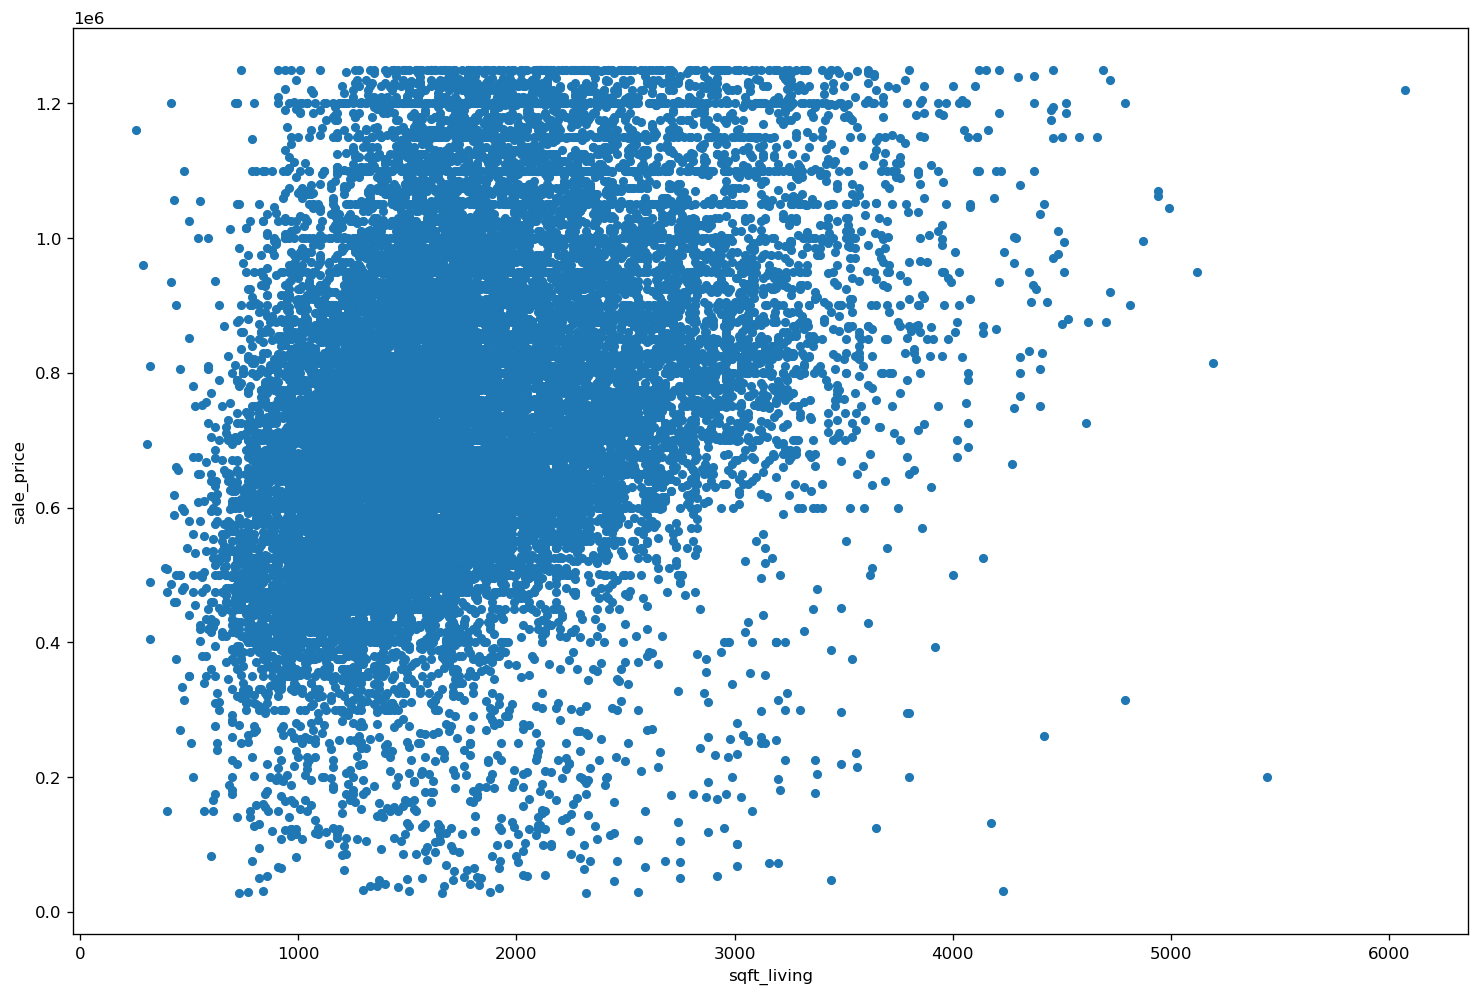

In [24]:
most_correlated = 'sqft_living'

fig, ax = plt.subplots(figsize=(15, 10), dpi=120)
df_clean.plot.scatter(x='sqft_living', y='sale_price', ax=ax);

In [25]:
# Set up variables for Regression
y = df_baseline['sale_price']
X_baseline = df_baseline[[most_correlated]]

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     3156.
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:01:38   Log-Likelihood:            -2.8974e+05
No. Observations:               21124   AIC:                         5.795e+05
Df Residuals:                   21122   BIC:                         5.795e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.249e+05   4308.506    121.823      

In [26]:
y_pred = baseline_results.predict(sm.add_constant(X_baseline))
baseline_mae = mean_absolute_error(y, y_pred)
baseline_mae

175279.53258737325

In [27]:
"""
This baseline model is considering a property that is NOT on the waterfront 
OR facing the greenbelt since they would NOT be considered an average 
property sold based on the original data and my previously determined 
definition on an average home. It is also based on a dataset that removed 
all properties valued over 1,250K.

sqft_living (i.e. square foot of living space) was the attribute 
most strongly correlated with price, and so our baseline model 
is describing this relationship.

The model is statistically significant.
It explains about 13% of the variance.
On average, the model is off by roughly 175.3K ($175,279.53) of its 
prediction of home sales price. 

The intercept is roughly 524.9K. 
So a home in King County, Washington, would sell for 524.9K
as long as:
- The property has 0 square footage of living space

The coefficient for "sqft_living" is rougly $126.60.
Therefore, according to this model, every additional square 
foot of living space increases the homes sale price roughly 
$126.60.
"""

'\nThis baseline model is considering a property that is NOT on the waterfront \nOR facing the greenbelt since they would NOT be considered an average \nproperty sold based on the original data and my previously determined \ndefinition on an average home. It is also based on a dataset that removed \nall properties valued over 1,250K.\n\nsqft_living (i.e. square foot of living space) was the attribute \nmost strongly correlated with price, and so our baseline model \nis describing this relationship.\n\nThe model is statistically significant.\nIt explains about 13% of the variance.\nOn average, the model is off by roughly 175.3K ($175,279.53) of its \nprediction of home sales price. \n\nThe intercept is roughly 524.9K. \nSo a home in King County, Washington, would sell for 524.9K\nas long as:\n- The property has 0 square footage of living space\n\nThe coefficient for "sqft_living" is rougly $126.60.\nTherefore, according to this model, every additional square \nfoot of living space incre

### Model Iteration

At this point I would like to add some base criteria to my model's second iteration. In this case I would like to add major features that I would expect an average home buyer looking to move into a property would first consider when approaching a real estate agent or someone looking to sell a property.

This would include:
* The amount of living and overall property area
* The number of floors
* The age of the property
* Whether it has a basement or a garage
* The time (season or year) the property was sold
* The heating solution of a property

My baseline or reference property will be:
* 1 story high
* Will NOT have a basement
* Will NOT have a garage
* Will be heated by gas

In [28]:
df_iteration = df_clean[['sqft_living', 
                         'sqft_lot', 
                         'num_floors_1.5', 
                         'num_floors_2.0', 
                         'num_floors_2.5', 
                         'num_floors_3.0', 
                         'num_floors_3.5', 
                         'num_floors_4.0', 
                         'yr_built', 
                         'has_basement_Yes', 
                         'has_garage_Yes', 
                         'season_Spring',
                         'season_Summer',
                         'season_Fall',
                         'yr_sold', 
                         'heat_source_Electricity', 
                         'heat_source_Oil', 
                         'heat_source_Solar_Equipped']]
df_iteration

,sqft_living,sqft_lot,num_floors_1.5,num_floors_2.0,num_floors_2.5,num_floors_3.0,num_floors_3.5,num_floors_4.0,yr_built,has_basement_Yes,has_garage_Yes,season_Spring,season_Summer,season_Fall,yr_sold,heat_source_Electricity,heat_source_Oil,heat_source_Solar_Equipped
0,1180,7140,0,0,0,0,0,0,69,0,0,1,0,0,1,0,0,0
1,2770,6703,0,0,0,0,0,0,50,1,0,0,0,0,0,0,1,0
2,2880,6156,0,0,0,0,0,0,56,1,0,0,0,1,0,0,0,0
3,2160,1400,0,1,0,0,0,0,110,1,1,0,0,0,0,0,0,0
4,1120,758,0,1,0,0,0,0,112,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30147,2100,7210,0,1,0,0,0,0,79,0,1,0,0,0,1,0,0,0
30149,1270,1141,0,1,0,0,0,0,107,1,1,0,0,1,0,0,0,0
30152,1620,3600,0,0,0,0,0,0,95,1,1,1,0,0,1,0,0,0
30153,2570,2889,0,1,0,0,0,0,106,1,1,0,0,0,1,0,0,0


In [29]:
X_iterated = df_iteration

iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()

print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     278.8
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:01:38   Log-Likelihood:            -2.8896e+05
No. Observations:               21124   AIC:                         5.780e+05
Df Residuals:                   21105   BIC:                         5.781e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [30]:
y_pred = iterated_results.predict(sm.add_constant(X_iterated))
iterated_mae = mean_absolute_error(y, y_pred)
baseline_mae, iterated_mae

(175279.53258737325, 165225.64913898628)

In [31]:
"""
This baseline model is considering a property that is NOT on the waterfront 
OR facing the greenbelt since they would NOT be considered an average 
property sold based on the original data and my previously determined 
definition on an average home. It is also based on a dataset that removed 
all properties valued over 1,250K.

Considering a confidence level of 0.01 all but the following 
coefficients are statistically significant:
- num_floors_3.5
- has_garage_Yes
- heat_source_Oil
- heat_source_Solar_Equipped

The model is statistically significant.
This model marginally improves the explained variance 
from roughly 13% to about 19% (19.1%).
The model predictions also performed marginally better.
Our predictions are now off by roughly $165.2K, instead of $175.3K in a 
given prediction.

The intercept is roughly 493.8K ($493,800). 
So a home in King County, Washington, would sell for roughly 493.8K
as long as:
- The property has 0 square footage of living space
- The property has 0 square footage of property area
- Is a single story residence
- Doesn't have a basement or garage
- Is heated by gas
- Was built in 1900
- Was sold before June 2021
- Was sold in the pre-determined winter months (i.e. December to February)

Changes to the following coefficients affect the sale price as follows:
- an increase of one square foot of living area increases the sale price 
  by roughly $119.5 ($119.48)
- an increase of one square foot of lot (property) area increases the sale 
  price by $0.23 ($0.2315)

- The sale price will go up by roughly $37.7K ($3,7710) when increasing 
  the size of the home from 1 story to 1.5 stories high.
- The sale price will go up by roughly $71.8K ($71,770) when increasing 
  the size of the home from 1 story to 2 stories high.
- The sale price will go up by roughly $108.3K ($108,300) when increasing 
  the size of the home from 1 story to 2.5 stories high.
- The sale price will go up by roughly $174.1K ($174,100) when increasing 
  the size of the home from 1 story to 3 stories high.
- The sale price will go up by roughly $161.2K ($161,200) when increasing 
  the size of the home from 1 story to 3.5 stories high.
- The sale price will go up by roughly $284.4K ($284,400) when increasing 
  the size of the home from 1 story to 4 stories high.

- The sale price will go down by about $0.9K ($897.90) by every year a home 
  is most recently constructed (starting from the 1900 and going up by 1).

- The sale price will go up by about $78.5K ($78,460) by adding a basement.
- The sale price will go up by about $4.2K ($4,229.38) by adding a garage.

- The sale price will go up by about $49.9K ($49,890) in the pre-determined 
  Spring season (March - May) when compared to the Winter (December - February)
- The sale price will go up by about $28.4K ($28,360) in the pre-determined 
  Summer season (June - August) when compared to the Winter (December - February)
- The sale price will go up by about $16.3K ($16,310) in the pre-determined 
  Fall season (September - November) when compared to the Winter (December - February)

- Between June 2021 and June 2022, a single year difference increases the 
  sale price of a home by $32.3K ($32,260).

- In comparison to a home heated by gas, the sale price of a home goes down by 
  about $16.9K ($16,910) when it is instead heated by electricity.
- In comparison to a home heated by gas, the sale price of a home goes down by 
  about $3.7K ($3,700.07) when it is instead heated by oil. 
- In comparison to a home heated by solely by gas, the sale price of a home goes 
  down by about $27.8K ($27,840) when it is equipped to be heated by solar and 
  supported by electricity, gas, or oil. 
"""

"\nThis baseline model is considering a property that is NOT on the waterfront \nOR facing the greenbelt since they would NOT be considered an average \nproperty sold based on the original data and my previously determined \ndefinition on an average home. It is also based on a dataset that removed \nall properties valued over 1,250K.\n\nConsidering a confidence level of 0.01 all but the following \ncoefficients are statistically significant:\n- num_floors_3.5\n- has_garage_Yes\n- heat_source_Oil\n- heat_source_Solar_Equipped\n\nThe model is statistically significant.\nThis model marginally improves the explained variance \nfrom roughly 13% to about 19% (19.1%).\nThe model predictions also performed marginally better.\nOur predictions are now off by roughly $165.2K, instead of $175.3K in a \ngiven prediction.\n\nThe intercept is roughly 493.8K ($493,800). \nSo a home in King County, Washington, would sell for roughly 493.8K\nas long as:\n- The property has 0 square footage of living spa

### Final Model

For a final model I would like to incorporate a more localized set of categorical data. This includes 'build_cond' and 'build_grade' (for which I have already preprocessed during the data cleaning phase).

The reason why I didn't include these categorical variables in the second iteration of my statistical model was due to lacking information from the source of the data. To explain each categorical variable in order:
- 'build_cond' is based on what appears to be subjective grading from an observer and is at risk of being improperly documented. It determines the overall condition and how much repair/maintenance a property is in need of. However, the criteria may have been influenced by the bias of the one making the report. Different people (i.e. the ones doing the reporting for this dataset and the eventual home buyer) will have differing opinions on what and what doesn't need repair or maintenance.
- 'build_grade' is also based on a grading from an observer and is still at risk of being improperly documented. The criteria seems to be a little more fleshed out since it considers the type of materials used during construction, whether the property meets code or not, whether the property is custom built/designed, or if it's more of a luxury purchase (i.e. mansion). In regards to whether a property meets code will depend on local government laws; so one would have to consider how similar their building code laws are in their area if they would like to use this model.

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21124 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sale_price                  21124 non-null  float64
 1   sqft_living                 21124 non-null  int64  
 2   sqft_lot                    21124 non-null  int64  
 3   yr_built                    21124 non-null  int64  
 4   num_floors_1.5              21124 non-null  uint8  
 5   num_floors_2.0              21124 non-null  uint8  
 6   num_floors_2.5              21124 non-null  uint8  
 7   num_floors_3.0              21124 non-null  uint8  
 8   num_floors_3.5              21124 non-null  uint8  
 9   num_floors_4.0              21124 non-null  uint8  
 10  has_basement_Yes            21124 non-null  uint8  
 11  has_garage_Yes              21124 non-null  uint8  
 12  yr_sold                     21124 non-null  int64  
 13  season_Fall                 211

In [33]:
# Copy the complete 'df_clean' dataset and remove 'sale_price' to build out the new model
df_final = df_clean
df_final = df_final.drop(['sale_price'], axis=1)

df_final

,sqft_living,sqft_lot,yr_built,num_floors_1.5,num_floors_2.0,num_floors_2.5,num_floors_3.0,num_floors_3.5,num_floors_4.0,has_basement_Yes,...,build_cond_Good,build_cond_Very Good,heat_source_Electricity,heat_source_Oil,heat_source_Solar_Equipped,build_grade_Average,build_grade_Better,build_grade_Good,build_grade_Low_Average,build_grade_Very_Good
0,1180,7140,69,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2770,6703,50,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,2880,6156,56,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,2160,1400,110,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1120,758,112,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30147,2100,7210,79,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
30149,1270,1141,107,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30152,1620,3600,95,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
30153,2570,2889,106,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [34]:
X_final = df_final

final_model = sm.OLS(y, sm.add_constant(X_final))
final_results = final_model.fit()

print(final_results.summary())

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     301.7
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:01:38   Log-Likelihood:            -2.8798e+05
No. Observations:               21124   AIC:                         5.760e+05
Df Residuals:                   21098   BIC:                         5.762e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [35]:
y_pred = final_results.predict(sm.add_constant(X_final))
final_mae = mean_absolute_error(y, y_pred)
baseline_mae, iterated_mae, final_mae

(175279.53258737325, 165225.64913898628, 155373.11083497724)

## Regression Results

In [36]:
"""
This baseline model is considering a property that is NOT on the waterfront 
OR facing the greenbelt since they would NOT be considered an average 
property sold based on the original data and my previously determined 
definition on an average home. It is also based on a dataset that removed 
all properties valued over 1,250K.

Considering a confidence level of 0.01 all but the following 
coefficients are statistically significant:
- num_floors_3.5
- season_Fall
- heat_source_Electricity
- heat_source_Oil
- heat_source_Solar_Equipped

The model is statistically significant.
The final model again marginally improves the explained variance 
from roughly 19% to about 26% (26.2%).
The model predictions also performed marginally better. 
The model's predicted sale_price is now off by roughly $155.4K ($155,373) 
(improving from the second iteration [$165.2K], or the baseline bodel 
[$175.3K]) in a given prediction.

The intercept is roughly 457.9K ($457,900). 
So a home in King County, Washington, would sell for roughly 493.8K
as long as:
- The property has 0 square footage of living space
- The property has 0 square footage of property area
- Is a single story residence
- Doesn't have a basement or garage
- Is heated by gas
- Was built in 1900
- Was sold before June 2021
- Was sold in the pre-determined winter months (i.e. December to February)
- Has an 'Average' build condition grade
- Has a 'Fair' building grade

Changes to the following coefficients affect the sale price as follows:
- an increase of one square foot of living area increases the sale price 
  by roughly $74 ($74.14)
- an increase of one square foot of lot (property) area increases the sale 
  price by $0.23 ($0.2347)

- The sale price will go down by about $1.8K ($1,795.65) by every year a home 
  is most recently constructed (starting from the 1900 and going up by 1).

- The sale price will go up by roughly $25.8K ($25,800) when increasing 
  the size of the home from 1 story to 1.5 stories high.
- The sale price will go up by roughly $43.8K ($43,810) when increasing 
  the size of the home from 1 story to 2 stories high.
- The sale price will go up by roughly $76.2K ($76,200) when increasing 
  the size of the home from 1 story to 2.5 stories high.
- The sale price will go up by roughly $94.4K ($94,430) when increasing 
  the size of the home from 1 story to 3 stories high.
- The sale price will go up by roughly $113K ($113,000) when increasing 
  the size of the home from 1 story to 3.5 stories high.
- The sale price will go up by roughly $213.9K ($213,900) when increasing 
  the size of the home from 1 story to 4 stories high.

- The sale price will go up by about $57.8K ($57,800) by adding a basement.
- The sale price will go down by about $12.5K ($12,520) by adding a garage.

- Between June 2021 and June 2022, a single year difference increases the 
  sale price of a home by $33.1K ($33,130).

- The sale price will go up by about $14K ($14,030) in the pre-determined 
  Fall season (September - November) when compared to the Winter (December - February)
- The sale price will go up by about $50.3K ($50,290) in the pre-determined 
  Spring season (March - May) when compared to the Winter (December - February)
- The sale price will go up by about $22.9K ($22,890) in the pre-determined 
  Summer season (June - August) when compared to the Winter (December - February)

- The sale price of a home with an 'Good' build condition goes up by about $10.7K 
  ($10,650) when compared to one with an 'Average' build condition.
- The sale price of a home with an 'Very Good' build condition goes up by about $38.7K 
  ($38,660) when compared to one with an 'Average' build condition.

- In comparison to a home heated by gas, the sale price of a home goes down by 
  about $8.8K ($8,765.9117) when it is instead heated by electricity.
- In comparison to a home heated by gas, the sale price of a home goes down by 
  about $4K ($4,004.7465) when it is instead heated by oil. 
- In comparison to a home heated by solely by gas, the sale price of a home goes 
  down by about $17.8K ($17,750) when it is equipped to be heated by solar and 
  supported by electricity, gas, or oil.

- The sale price of a home with an 'Low Average' build grade goes up by about $49.8K 
  ($49,800) when compared to one with an 'Fair' build grade.
- The sale price of a home with an 'Average' build grade goes up by about $184.5K 
  ($184,500) when compared to one with an 'Fair' build grade.
- The sale price of a home with an 'Good' build grade goes up by about $289.4K 
  ($289,400) when compared to one with an 'Fair' build grade.
- The sale price of a home with an 'Better' build grade goes up by about $380.8K 
  ($380,800) when compared to one with an 'Fair' build grade.
- The sale price of a home with an 'Very Good' build grade goes up by about $324.4K 
  ($324,400) when compared to one with an 'Fair' build grade.
"""

"\nThis baseline model is considering a property that is NOT on the waterfront \nOR facing the greenbelt since they would NOT be considered an average \nproperty sold based on the original data and my previously determined \ndefinition on an average home. It is also based on a dataset that removed \nall properties valued over 1,250K.\n\nConsidering a confidence level of 0.01 all but the following \ncoefficients are statistically significant:\n- num_floors_3.5\n- season_Fall\n- heat_source_Electricity\n- heat_source_Oil\n- heat_source_Solar_Equipped\n\nThe model is statistically significant.\nThe final model again marginally improves the explained variance \nfrom roughly 19% to about 26% (26.2%).\nThe model predictions also performed marginally better. \nThe model's predicted sale_price is now off by roughly $155.4K ($155,373) \n(improving from the second iteration [$165.2K], or the baseline bodel \n[$175.3K]) in a given prediction.\n\nThe intercept is roughly 457.9K ($457,900). \nSo a 

## Conclusion
Based on the original dataset and my restrictions, we managed to build a few statistical models. The latter of which is, statistically speaking, was more informative than the previous ones. We determined some basic features and took into consideration more subjective and locally informed data regarding the sale of homes in King County, Washington.

### Some Things to Consider About the Results
The mean value of the homes sold in our dataset was roughly 750K, a value which was not too far off from the median.

I would like to mention that the data collected in this dataset was well into some of the worst parts of the COVID 19 crisis. Individuals and businesses all suffered financially. Many people ended up having to work from home; and many continue to do so to this day. This has driven a lot of people to purchase or move into larger homes to give themselves the necessary room to perform their professional duties while also giving themselves more space for their personal lives. Some people also took many financial risks, taking into consideration that their savings could possible me less valuable in the case that their lives were at risk of expiring sooner than they originally planned; and therefore taking their financial leap by purchasing homes they could (at the time) afford.

One other thing that this dataset is unable to determine is to whom the properties were sold to. During the time period of the data collected there were many businesses that made it their mission to purchased many homes and treat them as investment properties with the intention of renting them out to individuals. This makes it difficult to determine if the records I decided to keep during the data cleaning process actually represented the types of buyers I defined as **Average** (specifically in the sense that the buyer would purchase the home to then live in).

Taking these things into consideration, the value that this model has to offer may be skewed to a significantly more 'seller-friendly' market. With current financial event's like the global inflation this model may not be the best representation of what to expect when trying to gather more properties under your listings or to sell your own home.

### What the Model Tells Us
The final model I developed doesn't explain a significant portion of the variance detected (73.8% is unexplained) in the sale price.
- This tells me that we probably are missing a few features/criteria that could best explain the difference between the predicted sale price our model offers versus what is actually seen in the dataset.
- The original dataset included features that could explain some of the variance in sale price, a quick example would be nuisance (i.e. a column that details if a 'house has traffic noise or other recorded nuisances'.

### Recommendations
#### The type of properties a real estate agency should make attempt to target and get listed under the pre-defined 'Average' home:
- Homes with a larger living area.
    - Multi-story homes are your best bet.
    - Avoid non-bungalo-like properties.
- Older homes.
- Homes with basements.
- Having a garage slightly de-values a home, but not by much.
- We can see a slight increase in the sale price of a property (roughly 33K) between the 1 year that the data was collected.
    - This could be explained by the rise in inflation or the mass purchase or residential properties by businesses looking to rent them.
- Don't shy away from properties that need a little maintenance.
- Gas heated properties seem to be the most valued, however not by much.
- Seek homes that have the criteria to meet the building grade higher than 'Fair'

        
#### How best to price a property
- Leverage the large living/internal spaces
    - Multi-leveled homes add significant value in this department.
    - Prices roughly increase from a range of 25.8K for 1.5 stories to 213.9K for 4 stories in comparison to single story homes.
    - Basements can add more than 50K in value to a home.
- Overall property size doesn't seem to be too significant.
    - This suggests that home buyers are not too concerned with lawn space.
- Leverage the age of the home
    - There appears to be an inherent value for homes constructed long ago compared to newer ones.
    - This could indicate a trust to their construction or provide them a sense of stability
    - It could also simply be something that they believe makes their home more 'interesting'
- Consider that home buyers don't appear to be too interested in having a garage.
- Consider that home buyers don't appear to be too disinterested in performing some maintenance.
    - A home with a 'Very Good' building condition only increases the property's value by less than 40K when compared to a property with an 'Average' building condition.
- You won't see any added value (or significant drop in value) from trying to sell a home that is heated by anything other than gas.
    - Interestingly enough, even when inspecting the properties that were equipped to power the property with solar panels alongside another heat source (gas, oil, or electricity) we see it still bring down a home's value by around 17K. 
- Leverage properties that are constructed with higher grade building materials (according to the specification found for 'build_grade')
    - Prices only going up from a range of roughly 50K - 380K when compared to a home with a build_grade above 'Fair'.
    - It is important to iterate that the criteria for what determines building's grade in the original dataset was not very specific.

#### When would be the best time to market your services or properties currently under your listings
- According to our model, Winter is the worst season to sell a property
    - In order of least to most profitable seasons to sell a property:
        - Winter
        - Fall
        - Summer
        - Spring
    - From this, we can determine that most of a real estate agency's marketing budget should be utilized in the summer months (as per our model these months would be June through August)

### Where to Go from Here
#### Changes I Would Make to the Model
If I could I would like to possible make some changes to the current model in this report like:
- Clean up the 'sqft_living' feature.
    - I would want to consider removing the records below the 25th percentile and above the 75th percentile of the cleaned dataset.
- Review what features I could and should apply non-linear transformations to to better predict the sale price. 
- Create new features like:
    - Adding the day of the week to determine the best day's to invest in marketing.
    - Adding the zip codes so that we can determine the most valuable neighborhoods.
    - Whether a property was ever renovated.
- Add features like:
    - Number of bedrooms and bathrooms
    - Whether there is any nuisances in the neighborhoods.
- I would also like to see if adding features from other sources that could indicate upselling opportunities; for example:
    - If an ISP (internet service providers) have, are currently, or have plans to add high speed fiber internet which would indicate a drop in high-tier internet prices.
    - Whether the area uses above or below ground telephone lines.
    - the quality of cell service
        - With a distinction between the quality of making a phone call and quality of data (wireless) internet connections.
    - Whether the property is or isn't near a daycare or educational institution (i.e. pre-school, kindergarten, elementary school, middle school, high school, university, or college).